In [2]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras import layers
from keras import activations

import matplotlib.pyplot as plt

classes_no = 10


def one_hot_encoding(labels):
    one_hot = tf.one_hot(labels, classes_no, dtype=tf.float32)
    return tf.reshape(one_hot, (labels.shape[0], classes_no))


def plot_accuracy(history):
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    ax = plt.gca()
    ax.set_ylim([0.0, 1.0])
    plt.show()


def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    ax = plt.gca()
    ax.set_ylim([0.0, 2.5])
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


def retrieve_history(name):
    np.load(f'history/{name}.npy', allow_pickle='TRUE').item()


def save_history(name, history):
    np.save(f'history/{name}.npy', history.history)


(x_train, y_raw_train), (x_test, y_raw_test) = tf.keras.datasets.cifar10.load_data()

train_size = 50000
test_size = 10000
epochs = 150
# train_size = 1000
# test_size = 10
# epochs = 10

x_train, y_train = x_train[:train_size], one_hot_encoding(y_raw_train[:train_size])
x_test, y_test = x_test[:test_size], one_hot_encoding(y_raw_test[:test_size])

# With sigmoid

In [2]:
def block(filters_no, filter_size=(3, 3), pool_size=(8, 8)):
    layer_1 = layers.Conv2D(
        filters_no, filter_size,
        strides=1,
        padding='same',
        activation=activations.sigmoid
    )
    layer_2 = layers.Conv2D(
        filters_no, filter_size,
        strides=1,
        padding='same',
        activation=activations.sigmoid
    )
    layer_3 = layers.MaxPooling2D(
        pool_size=pool_size,
        strides=pool_size,
        padding='same'
    )

    return [layer_1, layer_2, layer_3]

In [3]:
model = keras.Sequential([
    layers.Rescaling(scale=1./255.),
    *block(20),
    *block(40),
    layers.Flatten(),
    layers.Dense(10, activation=activations.softmax)
])


model.build([None, 32, 32, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 40)          7240      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 40)          14440     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 40)          0

In [4]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=.9)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(loss=loss_fn,optimizer=optimizer, metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/150
782/782 [==============================] - 40s 13ms/step - loss: 2.3072 - categorical_accuracy: 0.0995 - val_loss: 2.3033 - val_categorical_accuracy: 0.1000
Epoch 2/150
782/782 [==============================] - 9s 11ms/step - loss: 2.3033 - categorical_accuracy: 0.1004 - val_loss: 2.3033 - val_categorical_accuracy: 0.1000
Epoch 3/150
782/782 [==============================] - 9s 11ms/step - loss: 2.3034 - categorical_accuracy: 0.1008 - val_loss: 2.3029 - val_categorical_accuracy: 0.1000
Epoch 4/150
782/782 [==============================] - 9s 11ms/step - loss: 2.3034 - categorical_accuracy: 0.0983 - val_loss: 2.3028 - val_categorical_accuracy: 0.1000
Epoch 5/150
782/782 [==============================] - 8s 11ms/step - loss: 2.3034 - categorical_accuracy: 0.0985 - val_loss: 2.3031 - val_categorical_accuracy: 0.1000
Epoch 6/150
782/782 [==============================] - 8s 11ms/step - loss: 2.3032 - categorical_accuracy: 0.1018 - val_loss: 2.3029 - val_categorical_accuracy

KeyboardInterrupt: ignored

# With relu activation

In [5]:
def block(filters_no, filter_size=(3, 3), pool_size=(8, 8)):
    layer_1 = layers.Conv2D(
        filters_no, filter_size,
        strides=1,
        padding='same',
        activation=activations.relu
    )
    layer_2 = layers.Conv2D(
        filters_no, filter_size,
        strides=1,
        padding='same',
        activation=activations.relu
    )
    layer_3 = layers.MaxPooling2D(
        pool_size=pool_size,
        strides=pool_size,
        padding='same'
    )

    return [layer_1, layer_2, layer_3]

In [6]:
model = keras.Sequential([
    layers.Rescaling(scale=1./255.),
    *block(20),
    *block(40),
    layers.Flatten(),
    layers.Dense(10, activation=activations.softmax)
])


model.build([None, 32, 32, 3])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 40)          7240      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 40)          14440     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 40)         

In [7]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=.9)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(loss=loss_fn,optimizer=optimizer, metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/150
782/782 [==============================] - 10s 12ms/step - loss: 2.2713 - categorical_accuracy: 0.1511 - val_loss: 2.2060 - val_categorical_accuracy: 0.2137
Epoch 2/150
782/782 [==============================] - 8s 11ms/step - loss: 2.0227 - categorical_accuracy: 0.2726 - val_loss: 1.8792 - val_categorical_accuracy: 0.3193
Epoch 3/150
782/782 [==============================] - 8s 11ms/step - loss: 1.7971 - categorical_accuracy: 0.3528 - val_loss: 1.7338 - val_categorical_accuracy: 0.3799
Epoch 4/150
782/782 [==============================] - 8s 11ms/step - loss: 1.6504 - categorical_accuracy: 0.4049 - val_loss: 1.5672 - val_categorical_accuracy: 0.4337
Epoch 5/150
782/782 [==============================] - 8s 11ms/step - loss: 1.5466 - categorical_accuracy: 0.4429 - val_loss: 1.5357 - val_categorical_accuracy: 0.4485
Epoch 6/150
782/782 [==============================] - 8s 11ms/step - loss: 1.4802 - categorical_accuracy: 0.4679 - val_loss: 1.4474 - val_categorical_accuracy

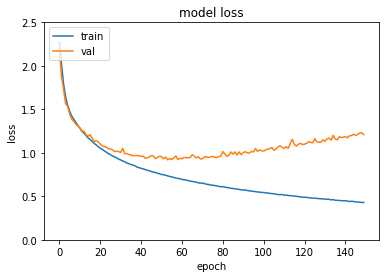

In [8]:
plot_loss(history)

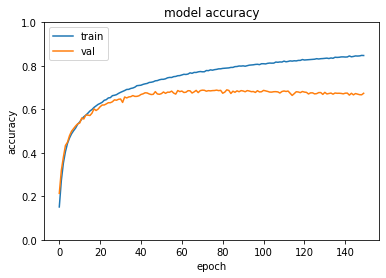

In [9]:
plot_accuracy(history)

In [11]:
## plot results and save history

save_history('part_3_a', history)

In [12]:
model = keras.Sequential([
    layers.Rescaling(scale=1./255.),
    *block(20),
    *block(40),
    *block(80),
    *block(160),
    layers.Flatten(),
    layers.Dense(10, activation=activations.softmax)
])


model.build([None, 32, 32, 3])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 40)          7240      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 40)          14440     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 40)         

In [13]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=.9)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(loss=loss_fn,optimizer=optimizer, metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/150
782/782 [==============================] - 13s 16ms/step - loss: 2.3026 - categorical_accuracy: 0.0984 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 2/150
782/782 [==============================] - 12s 15ms/step - loss: 2.3026 - categorical_accuracy: 0.0989 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 3/150
782/782 [==============================] - 12s 15ms/step - loss: 2.3026 - categorical_accuracy: 0.0988 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 4/150
782/782 [==============================] - 12s 15ms/step - loss: 2.3026 - categorical_accuracy: 0.0984 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 5/150
782/782 [==============================] - 12s 15ms/step - loss: 2.3026 - categorical_accuracy: 0.0975 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 6/150
782/782 [==============================] - 12s 15ms/step - loss: 2.3026 - categorical_accuracy: 0.0985 - val_loss: 2.3026 - val_categorical_acc

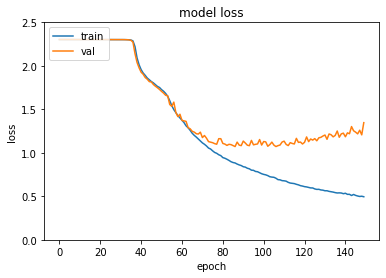

In [14]:
plot_loss(history)

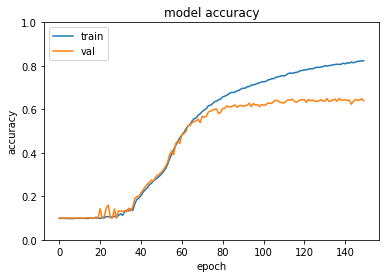

In [15]:
plot_accuracy(history)

In [16]:

save_history('part_3_b', history)

In [2]:
def block(filters_no, filter_size=(3, 3), pool_size=(8, 8)):
    layer_1 = layers.Conv2D(
        filters_no, filter_size,
        strides=1,
        padding='same',
        activation=activations.relu
    )
    layer_1_post = layers.BatchNormalization()
    layer_2 = layers.Conv2D(
        filters_no, filter_size,
        strides=1,
        padding='same',
        activation=activations.relu
    )
    
    layer_3 = layers.MaxPooling2D(
        pool_size=pool_size,
        strides=pool_size,
        padding='same'
    )

    return [layer_1, layer_1_post, layer_2, layer_3]

model = keras.Sequential([
    layers.Rescaling(scale=1./255.),
    *block(20),
    *block(40),
    *block(80),
    *block(160),
    layers.Flatten(),
    layers.Dense(10, activation=activations.softmax)
])


model.build([None, 32, 32, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 20)        560       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 20)        80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 40)          7240      
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 40)          1

In [3]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=.9)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(loss=loss_fn,optimizer=optimizer, metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/150
782/782 [==============================] - 43s 16ms/step - loss: 1.6655 - categorical_accuracy: 0.3913 - val_loss: 1.4185 - val_categorical_accuracy: 0.4857
Epoch 2/150
782/782 [==============================] - 12s 16ms/step - loss: 1.2457 - categorical_accuracy: 0.5520 - val_loss: 1.4100 - val_categorical_accuracy: 0.5007
Epoch 3/150
782/782 [==============================] - 12s 15ms/step - loss: 1.1111 - categorical_accuracy: 0.6024 - val_loss: 1.2206 - val_categorical_accuracy: 0.5673
Epoch 4/150
782/782 [==============================] - 12s 15ms/step - loss: 1.0289 - categorical_accuracy: 0.6345 - val_loss: 1.1350 - val_categorical_accuracy: 0.5912
Epoch 5/150
782/782 [==============================] - 12s 15ms/step - loss: 0.9735 - categorical_accuracy: 0.6565 - val_loss: 1.1385 - val_categorical_accuracy: 0.6055
Epoch 6/150
782/782 [==============================] - 12s 16ms/step - loss: 0.9326 - categorical_accuracy: 0.6718 - val_loss: 1.1910 - val_categorical_acc

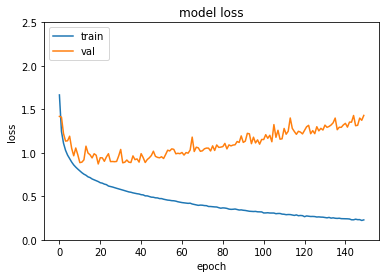

In [4]:
plot_loss(history)

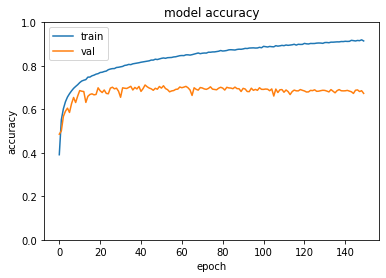

In [5]:
plot_accuracy(history)

In [7]:
save_history('part_3_c', history)

In [4]:
def block(filters_no, dropout_rate, filter_size=(3, 3), pool_size=(8, 8)):
    layer_1 = layers.Conv2D(
        filters_no, filter_size,
        strides=1,
        padding='same',
        activation=activations.relu
    )
    layer_1_post = layers.BatchNormalization()
    layer_2 = layers.Conv2D(
        filters_no, filter_size,
        strides=1,
        padding='same',
        activation=activations.relu
    )
    
    layer_3 = layers.MaxPooling2D(
        pool_size=pool_size,
        strides=pool_size,
        padding='same'
    )

    dropout_layer = layers.Dropout(dropout_rate)

    return [layer_1, layer_1_post, layer_2, layer_3, dropout_layer]

model = keras.Sequential([
    layers.Rescaling(scale=1./255.),
    *block(20, .1),
    *block(40, .2),
    *block(80, .3),
    *block(160, .4),
    layers.Flatten(),
    layers.Dense(10, activation=activations.softmax)
])


model.build([None, 32, 32, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 20)        80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 20)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 40)          7

In [5]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=.9)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(loss=loss_fn,optimizer=optimizer, metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/150
782/782 [==============================] - 15s 16ms/step - loss: 2.0178 - categorical_accuracy: 0.2201 - val_loss: 1.7308 - val_categorical_accuracy: 0.3284
Epoch 2/150
782/782 [==============================] - 12s 16ms/step - loss: 1.7525 - categorical_accuracy: 0.3195 - val_loss: 1.6670 - val_categorical_accuracy: 0.3739
Epoch 3/150
782/782 [==============================] - 12s 16ms/step - loss: 1.6372 - categorical_accuracy: 0.3710 - val_loss: 1.4352 - val_categorical_accuracy: 0.4591
Epoch 4/150
782/782 [==============================] - 12s 15ms/step - loss: 1.5523 - categorical_accuracy: 0.4121 - val_loss: 1.4126 - val_categorical_accuracy: 0.4660
Epoch 5/150
782/782 [==============================] - 12s 16ms/step - loss: 1.4852 - categorical_accuracy: 0.4438 - val_loss: 1.4193 - val_categorical_accuracy: 0.4797
Epoch 6/150
782/782 [==============================] - 12s 15ms/step - loss: 1.4275 - categorical_accuracy: 0.4715 - val_loss: 1.2876 - val_categorical_acc

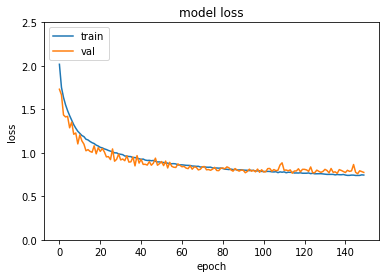

In [6]:
plot_loss(history)

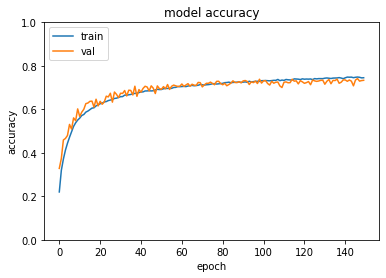

In [7]:
plot_accuracy(history)

In [8]:
save_history('part_3_d', history)